# Basic Example of ESMValTool provenance

Links:
* https://prov.readthedocs.io/en/latest/index.html
* https://github.com/ESMValGroup/ESMValCore/blob/master/esmvalcore/_provenance.py

In [1]:
from prov.model import ProvDocument

In [2]:
# Create a new provenance document
doc = ProvDocument()

## Namespaces

In [3]:
# Declaring namespaces for various prefixes used in the example
ESMVALTOOL_URI_PREFIX = 'https://esmvaltool.org/'
doc.add_namespace('software', ESMVALTOOL_URI_PREFIX + 'software')  # esmvaltool
doc.add_namespace('project', ESMVALTOOL_URI_PREFIX + 'project')  # copernicus, magic
doc.add_namespace('author', ESMVALTOOL_URI_PREFIX + 'author') # author of the recipe, algorithm
doc.add_namespace('recipe', ESMVALTOOL_URI_PREFIX + 'recipe')  # workflow description
doc.add_namespace('task', ESMVALTOOL_URI_PREFIX + 'task')  # jobs, calculations, algorithms
doc.add_namespace('file', ESMVALTOOL_URI_PREFIX + 'file')  # netcdf, plots
doc.add_namespace('attribute', ESMVALTOOL_URI_PREFIX + 'attribute')  # netcdf attributes, headers variables

<Namespace: attribute {https://esmvaltool.org/attribute}>

## ESMValTool Recipe
An ESMValTool *recipe* is kind of a workflow description. It defines input files and a simple chain of tasks (jobs, calculations).

In [4]:
# Create recipe (entity) and its author and project (agents)
recipe = doc.entity('recipe:recipe_rainfarm.yml')
author1 = doc.agent('author:von Hardenberg, Jost')
project1 = doc.agent('project:Copernicus Climate Change Service (MAGIC)')


In [5]:
# Relate recipe to author and project
doc.wasAttributedTo(recipe, author1)
doc.wasAttributedTo(recipe, project1)

<ProvAttribution: (recipe:recipe_rainfarm.yml, project:Copernicus Climate Change Service (MAGIC))>

In [6]:
# Show current doc
print(doc.get_provn())

document
  prefix software <https://esmvaltool.org/software>
  prefix project <https://esmvaltool.org/project>
  prefix author <https://esmvaltool.org/author>
  prefix recipe <https://esmvaltool.org/recipe>
  prefix task <https://esmvaltool.org/task>
  prefix file <https://esmvaltool.org/file>
  prefix attribute <https://esmvaltool.org/attribute>
  
  entity(recipe:recipe_rainfarm.yml)
  agent(author:von Hardenberg, Jost)
  agent(project:Copernicus Climate Change Service (MAGIC))
  wasAttributedTo(recipe:recipe_rainfarm.yml, author:von Hardenberg, Jost)
  wasAttributedTo(recipe:recipe_rainfarm.yml, project:Copernicus Climate Change Service (MAGIC))
endDocument


## Task one
Aggregates daily values to yearly values.

In [7]:
# software used
software = doc.activity('software:esmvaltool==2.0.0')

In [8]:
# task one
task1 = doc.activity('task:rainfarm/one')

In [9]:
# task started by esmvaltool
doc.start(task1, starter=software, trigger=recipe)

<ProvStart: (task:rainfarm/one, recipe:recipe_rainfarm.yml)>

In [10]:
# Generated Output file from task one
input1 = doc.entity('file:pr_19900101-19991231.nc', {'attribute:standard_name': 'precipitation_flux'} )
output1 = doc.entity('file:pr_1990-1999.nc', {'attribute:standard_name': 'precipitation_flux'})
doc.wasDerivedFrom(output1, input1, activity=task1)

<ProvDerivation: (file:pr_1990-1999.nc, file:pr_19900101-19991231.nc)>

In [11]:
# Show current doc
print(doc.get_provn())

document
  prefix software <https://esmvaltool.org/software>
  prefix project <https://esmvaltool.org/project>
  prefix author <https://esmvaltool.org/author>
  prefix recipe <https://esmvaltool.org/recipe>
  prefix task <https://esmvaltool.org/task>
  prefix file <https://esmvaltool.org/file>
  prefix attribute <https://esmvaltool.org/attribute>
  
  entity(recipe:recipe_rainfarm.yml)
  agent(author:von Hardenberg, Jost)
  agent(project:Copernicus Climate Change Service (MAGIC))
  wasAttributedTo(recipe:recipe_rainfarm.yml, author:von Hardenberg, Jost)
  wasAttributedTo(recipe:recipe_rainfarm.yml, project:Copernicus Climate Change Service (MAGIC))
  activity(software:esmvaltool==2.0.0, -, -)
  activity(task:rainfarm/one, -, -)
  wasStartedBy(task:rainfarm/one, recipe:recipe_rainfarm.yml, software:esmvaltool==2.0.0, -)
  entity(file:pr_19900101-19991231.nc, [attribute:standard_name="precipitation_flux"])
  entity(file:pr_1990-1999.nc, [attribute:standard_name="precipitation_flux"])
  w

## Task two
downscale input netcdf file.

In [12]:
# task two
task2 = doc.activity('task:rainfarm/two')

In [13]:
# task started by esmvaltool
doc.start(task2, starter=software, trigger=recipe)

<ProvStart: (task:rainfarm/two, recipe:recipe_rainfarm.yml)>

In [14]:
# Generated Output file from task two
output2 = doc.entity('file:downscaled_pr_1990-1999.nc')
doc.wasDerivedFrom(output2, output1, activity=task2)

<ProvDerivation: (file:downscaled_pr_1990-1999.nc, file:pr_1990-1999.nc)>

In [15]:
# Show current doc
print(doc.get_provn())

document
  prefix software <https://esmvaltool.org/software>
  prefix project <https://esmvaltool.org/project>
  prefix author <https://esmvaltool.org/author>
  prefix recipe <https://esmvaltool.org/recipe>
  prefix task <https://esmvaltool.org/task>
  prefix file <https://esmvaltool.org/file>
  prefix attribute <https://esmvaltool.org/attribute>
  
  entity(recipe:recipe_rainfarm.yml)
  agent(author:von Hardenberg, Jost)
  agent(project:Copernicus Climate Change Service (MAGIC))
  wasAttributedTo(recipe:recipe_rainfarm.yml, author:von Hardenberg, Jost)
  wasAttributedTo(recipe:recipe_rainfarm.yml, project:Copernicus Climate Change Service (MAGIC))
  activity(software:esmvaltool==2.0.0, -, -)
  activity(task:rainfarm/one, -, -)
  wasStartedBy(task:rainfarm/one, recipe:recipe_rainfarm.yml, software:esmvaltool==2.0.0, -)
  entity(file:pr_19900101-19991231.nc, [attribute:standard_name="precipitation_flux"])
  entity(file:pr_1990-1999.nc, [attribute:standard_name="precipitation_flux"])
  w

## Serialize as xml or json

In [16]:
print(doc.serialize(format='xml'))

<?xml version='1.0' encoding='ASCII'?>
<prov:document xmlns:software="https://esmvaltool.org/software" xmlns:project="https://esmvaltool.org/project" xmlns:author="https://esmvaltool.org/author" xmlns:recipe="https://esmvaltool.org/recipe" xmlns:task="https://esmvaltool.org/task" xmlns:file="https://esmvaltool.org/file" xmlns:attribute="https://esmvaltool.org/attribute" xmlns:prov="http://www.w3.org/ns/prov#" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <prov:entity prov:id="recipe:recipe_rainfarm.yml"/>
  <prov:agent prov:id="author:von Hardenberg, Jost"/>
  <prov:agent prov:id="project:Copernicus Climate Change Service (MAGIC)"/>
  <prov:wasAttributedTo>
    <prov:entity prov:ref="recipe:recipe_rainfarm.yml"/>
    <prov:agent prov:ref="author:von Hardenberg, Jost"/>
  </prov:wasAttributedTo>
  <prov:wasAttributedTo>
    <prov:entity prov:ref="recipe:recipe_rainfarm.yml"/>
    <prov:agent prov:ref="project:Copernicus Climate Cha

## Plot as png diagram

In [17]:
from prov.dot import prov_to_dot
figure = prov_to_dot(doc)
figure.write_png("basic_esmvaltool_prov.png")

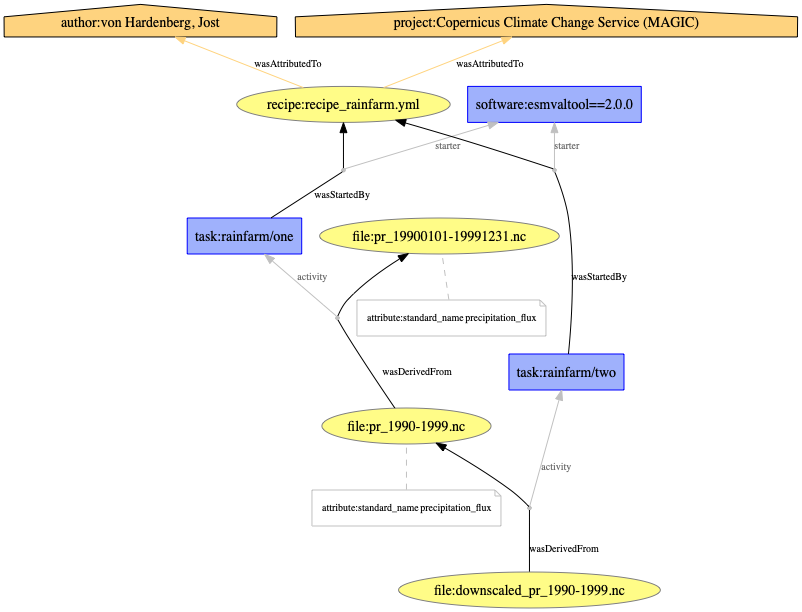

In [18]:
from IPython.display import Image
Image("basic_esmvaltool_prov.png")